# **1. Import Library** (FIX)

Pada tahap ini, kita akan mengimpor beberapa pustaka (library) Python yang diperlukan untuk melakukan analisis data serta membangun model machine learning. Pustaka ini mencakup berbagai fungsi, mulai dari manipulasi data, visualisasi, hingga pembangunan model machine learning.

In [2]:
# Import library untuk manipulasi dan visualisasi Data
import pandas as pd  # Untuk mengelola dan menganalisis data dalam bentuk DataFrame
import numpy as np
import seaborn as sns  # Untuk visualisasi data yang lebih informatif
import matplotlib.pyplot as plt  # Untuk membuat grafik dan plot

# Import library untuk preprocessing data
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Import library untuk membangun model machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import library untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering** (FIX)

Pada tahap ini, Kita perlu memuat dataset ke dalam notebook dalam format CSV dengan menggunakan pustaka `pandas` untuk membacanya. Kita akan mengecek beberapa baris awal dataset untuk memahami struktur datanya.

In [3]:
df_sales_cleaned = pd.read_csv('Dataset_klasifikasi.csv')
df_sales_cleaned

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,Medium,Low,2
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,High,Low,0
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,High,Low,2
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,Low,Low,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,Low,Low,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,ORD326977,CUS6058,B2C,Volvic,Water,0.57,14.0,0.00,7.98,Thüringen,2022-05-16,High,Low,0
3772,ORD2103635,CUS7837,B2C,Mango Juice,Juices,3.12,3.0,0.00,9.36,Nordrhein-Westfalen,2021-10-30,Low,Low,1
3773,ORD927122,CUS1898,B2C,Vio Wasser,Water,1.71,3.0,0.00,5.13,Niedersachsen,2023-08-23,Low,Low,0
3774,ORD1092734,CUS3026,B2C,Mango Juice,Juices,3.12,2.0,0.00,6.24,Schleswig-Holstein,2021-06-30,Low,Low,1


# **3. Data Splitting** (FIX)

Pertama-tama kita akan membersihkan dataset agar dataset hanya berisi informasi yang relevan dan tidak mengandung duplikasi yang dapat memengaruhi analisis. Pada tahap ini, terdapat beberapa kolom yang kurang relevan, seperti Order_ID dan Customer_ID, yang tidak memberikan kontribusi signifikan dalam analisis. Selain itu, kolom seperti Order_Date, Quantity_Category, dan Discount_Category juga dihapus karena tidak diperlukan dalam pemodelan.

In [4]:
df_sales_cleaned = df_sales_cleaned.drop(columns=['Order_ID','Customer_ID','Order_Date','Quantity_Category','Discount_Category'])

Untuk menghindari bias akibat data yang berulang, dilakukan penghapusan duplikasi. Hal ini bertujuan agar setiap baris dalam dataset merepresentasikan informasi yang unik, sehingga model dapat belajar dari pola yang beragam tanpa dipengaruhi oleh data yang berulang.

In [5]:
df_sales_cleaned = df_sales_cleaned.drop_duplicates(ignore_index=True)

Cek kembali data setelah dilakukan penghapusan duplikasi dengan menggunakan method info().

In [6]:
df_sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  3619 non-null   object 
 1   Product        3619 non-null   object 
 2   Category       3619 non-null   object 
 3   Unit_Price     3619 non-null   float64
 4   Quantity       3619 non-null   float64
 5   Discount       3619 non-null   float64
 6   Total_Price    3619 non-null   float64
 7   Region         3619 non-null   object 
 8   Cluster        3619 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 254.6+ KB


Setelah proses ini, dataset menjadi lebih ringkas dan hanya berisi kolom-kolom yang diperlukan untuk analisis lebih lanjut. Tidak ada lagi duplikasi yang dapat mempengaruhi hasil pemodelan. Tahap ini penting untuk memastikan bahwa model yang akan dibangun dapat melakukan generalisasi dengan baik terhadap data baru.

Langkah penting yang harus dilakukan adalah memisahkan dataset menjadi features (X) dan target (y). Dalam konteks ini, features merupakan variabel independen yang akan digunakan oleh model untuk melakukan prediksi, sedangkan target adalah variabel dependen yang menjadi output dari model.

Pada dataset ini, kolom 'Cluster' adalah label atau target yang ingin diprediksi, sehingga perlu dipisahkan dari dataset utama. Sementara itu, kolom lainnya akan menjadi fitur yang digunakan dalam analisis.

In [7]:
X = df_sales_cleaned.drop(columns=['Cluster'])
y = df_sales_cleaned['Cluster']

# Tampilkan lima baris pertama dari fitur
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen


Setelah proses ini, dataset terbagi menjadi dua bagian:
- X (Fitur): Berisi seluruh kolom kecuali 'Cluster', yang akan digunakan sebagai input dalam model.
- y (Target): Berisi hanya kolom 'Cluster', yang akan menjadi label atau hasil prediksi model.

Tahap ini penting untuk memastikan bahwa model hanya belajar dari informasi yang relevan tanpa kebocoran data dari target.

Kita perlu memastikan bahwa data numerik memiliki skala yang seragam. Salah satu metode yang umum digunakan untuk ini adalah normalisasi.

Dalam dataset ini, terdapat beberapa kolom numerik dengan rentang nilai yang berbeda. Jika tidak dinormalisasi, model dapat memberikan bobot yang lebih besar pada fitur dengan nilai lebih tinggi, yang dapat menyebabkan bias dalam proses pelatihan. Oleh karena itu, kita akan menggunakan MinMaxScaler dari sklearn.preprocessing untuk menormalisasi semua kolom numerik ke dalam rentang 0 hingga 1.

In [8]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Tampilkan lima baris pertama setelah normalisasi
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.119658,0.093750,0.0,0.045157,Bremen
1,B2B,Selters,Water,0.063248,0.703125,1.0,0.189856,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.400000,0.453125,0.5,0.497382,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.097436,0.031250,0.0,0.015380,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.182906,0.046875,0.0,0.034424,Bremen


Setelah proses ini, semua kolom numerik dalam dataset telah diubah ke skala 0 hingga 1, yang memastikan bahwa tidak ada fitur yang mendominasi model karena perbedaan skala. Dengan data yang telah dinormalisasi, model yang akan kita gunakan nantinya dapat bekerja lebih optimal dan menghasilkan prediksi yang lebih akurat.

Dataset yang kita gunakan mengandung beberapa fitur kategorikal, yaitu kolom yang berisi nilai dalam bentuk teks atau kategori. Namun, model machine learning tidak dapat bekerja langsung dengan data kategorikal, sehingga kita perlu mengonversinya ke bentuk numerik.

Salah satu metode yang umum digunakan untuk encoding data kategorikal adalah Label Encoding, yang mengubah setiap kategori dalam suatu fitur menjadi angka unik. Ini berguna ketika kategori memiliki hubungan ordinal atau saat kita ingin menggunakan model yang tidak sensitif terhadap skala nilai, seperti tree-based models (misalnya, Random Forest dan Decision Tree).

Dalam tahap ini, kita akan menerapkan Label Encoding menggunakan LabelEncoder dari sklearn.preprocessing untuk mengonversi semua kolom kategorikal ke dalam format numerik.

In [9]:
# Buat instance LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

# Tampilkan lima baris pertama setelah encoding
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.119658,0.093750,0.0,0.045157,4
1,0,32,3,0.063248,0.703125,1.0,0.189856,13
2,0,20,2,0.400000,0.453125,0.5,0.497382,14
3,1,29,3,0.097436,0.031250,0.0,0.015380,6
4,1,2,0,0.182906,0.046875,0.0,0.034424,4


Setelah semua fitur numerik telah dinormalisasi dan fitur kategorikal telah dikonversi menjadi format numerik menggunakan Label Encoding, langkah selanjutnya adalah membagi dataset menjadi training set dan test set.

Proses ini penting untuk mengevaluasi performa model machine learning. Dengan memisahkan sebagian data untuk pengujian, kita dapat mengukur bagaimana model akan bekerja pada data yang belum pernah dilihat sebelumnya.

Dalam pembagian ini:
- Training set (X_train, y_train) digunakan untuk melatih model.
- Test set (X_test, y_test) digunakan untuk mengevaluasi kinerja model setelah pelatihan.

In [10]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2895, 8), y_train=(2895,)
Test set shape: X_test=(724, 8), y_test=(724,)


Hasil dari X_train.shape dan X_test.shape menunjukkan jumlah sampel dan fitur dalam masing-masing set, sehingga kita dapat memastikan bahwa pemisahan dilakukan dengan benar.

# **4. Membangun Model Klasifikasi**


### **4.1. Membangun Model Klasifikasi** (FIX)

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

---

Setelah data dibersihkan, dikonversi, dinormalisasi, dan dibagi menjadi training set dan test set, langkah selanjutnya adalah melatih model machine learning.

Pada tahap ini, kita akan menggunakan tiga model berbeda untuk melakukan klasifikasi:
- Random Forest Classifier – Model berbasis ensemble yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.
- Logistic Regression – Model statistik yang sering digunakan untuk klasifikasi biner maupun multiklas.
- Decision Tree Classifier – Model berbasis aturan yang membuat keputusan berdasarkan fitur dalam bentuk pohon.

Ketiga model akan dilatih menggunakan training set (X_train, y_train) agar dapat mempelajari pola dari data. Seluruh model menggunakan random_state=69 untuk memastikan hasil yang konsisten setiap kali kode dijalankan.

In [11]:
# Melatih model dengan training set
log_reg = LogisticRegression(max_iter=1000, random_state=69).fit(X_train, y_train)
dt = DecisionTreeClassifier(max_depth=5, random_state=69).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=69).fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Setelah proses pelatihan selesai, ketiga model kini telah terlatih dengan training set dan siap untuk dievaluasi menggunakan test set (X_test).

### **4.2. Evaluasi Model Klasifikasi** (FIX)

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

---

Setelah melatih model, langkah berikutnya adalah mengevaluasi kinerjanya. Salah satu cara yang paling umum digunakan dalam klasifikasi adalah Confusion Matrix.

Confusion Matrix adalah tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas dalam data uji. Matriks ini membantu dalam memahami kesalahan klasifikasi dan pola distribusi prediksi model.

Pada tahap ini, kita akan membuat fungsi plot_confusion_matrix() untuk menampilkan confusion matrix dalam bentuk heatmap yang lebih mudah dianalisis.

In [12]:
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    """
    Fungsi untuk menampilkan confusion matrix dengan heatmap.
    
    Parameters:
    - y_true: array-like, label asli
    - y_pred: array-like, label hasil prediksi
    - model_name: str, nama model yang akan ditampilkan di judul grafik
    """
    unique_labels = sorted(set(y_true))  # Ambil label unik untuk sumbu x dan y
    cm = confusion_matrix(y_true, y_pred)  # Hitung confusion matrix
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False, linewidths=0.5, center=0,
                xticklabels=unique_labels,
                yticklabels=unique_labels)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

Selanjutnya kita akan mengevaluasi kinerja model yang telah dilatih sebelumnya. Salah satu cara terbaik untuk mengevaluasi model klasifikasi adalah dengan menggunakan Classification Report dari Scikit-Learn.

Classification Report memberikan metrik utama seperti:
- Precision – Seberapa banyak prediksi positif yang benar dibandingkan keseluruhan prediksi positif.
- Recall – Seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.
- F1-score – Rata-rata harmonik antara precision dan recall.
- Support – Jumlah sampel sebenarnya di setiap kelas.

#### -- **Model Logistic Regression**

Kita akan menggunakan classification_report() untuk menganalisis performa model Logistic Regression terhadap data uji.

In [13]:
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred, digits=5))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       215
           1    1.00000   1.00000   1.00000       200
           2    1.00000   1.00000   1.00000       192
           3    1.00000   1.00000   1.00000       117

    accuracy                        1.00000       724
   macro avg    1.00000   1.00000   1.00000       724
weighted avg    1.00000   1.00000   1.00000       724



**Insight:**
- Skor 1.000 pada semua metrik (Precision, Recall, F1-score) menunjukkan bahwa model memperoleh prediksi sempurna pada data uji.
- Tidak ada kesalahan klasifikasi, yang berarti tidak ada false positives atau false negatives dalam hasil prediksi.

Untuk melihat apakah model Logistic Regression dapat mengklasifikasikan dengan baik, kita cukup memanggil fungsi plot_confusion_matrix() dengan parameter y_test dan y_pred.

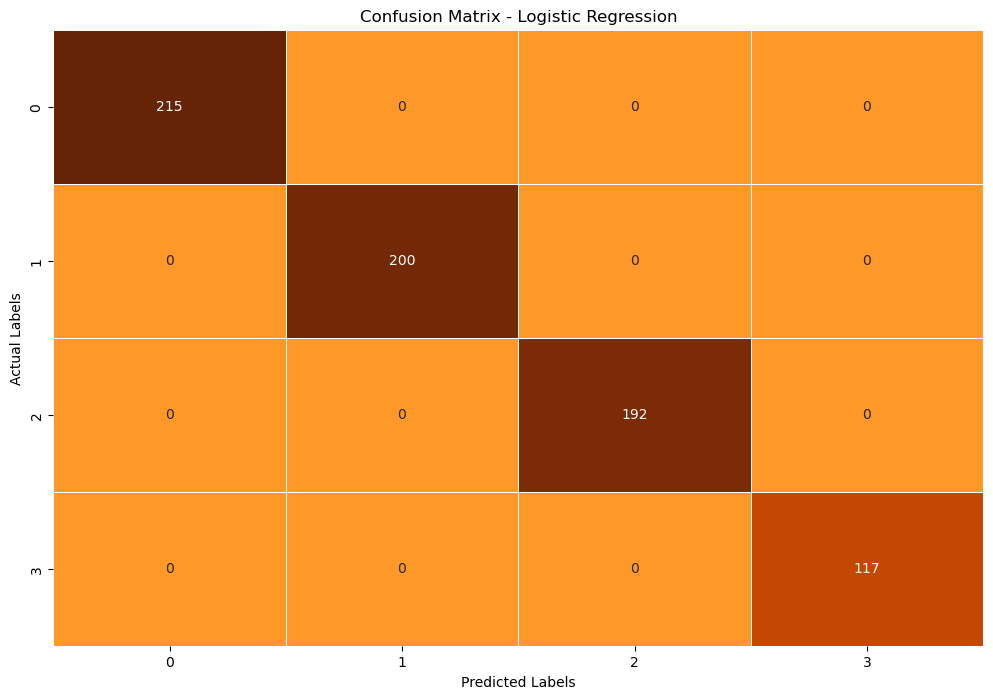

In [14]:
plot_confusion_matrix(y_test, log_reg_pred, model_name="Logistic Regression")

#### -- **Model Decision Tree**

Kita akan menggunakan classification_report() untuk menganalisis performa model Decision Tree terhadap data uji.

In [15]:
dt_pred = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred, digits=5))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       215
           1    1.00000   1.00000   1.00000       200
           2    1.00000   1.00000   1.00000       192
           3    1.00000   1.00000   1.00000       117

    accuracy                        1.00000       724
   macro avg    1.00000   1.00000   1.00000       724
weighted avg    1.00000   1.00000   1.00000       724



Untuk melihat apakah model Decision Tree dapat mengklasifikasikan dengan baik, kita cukup memanggil fungsi plot_confusion_matrix() dengan parameter y_test dan y_pred.

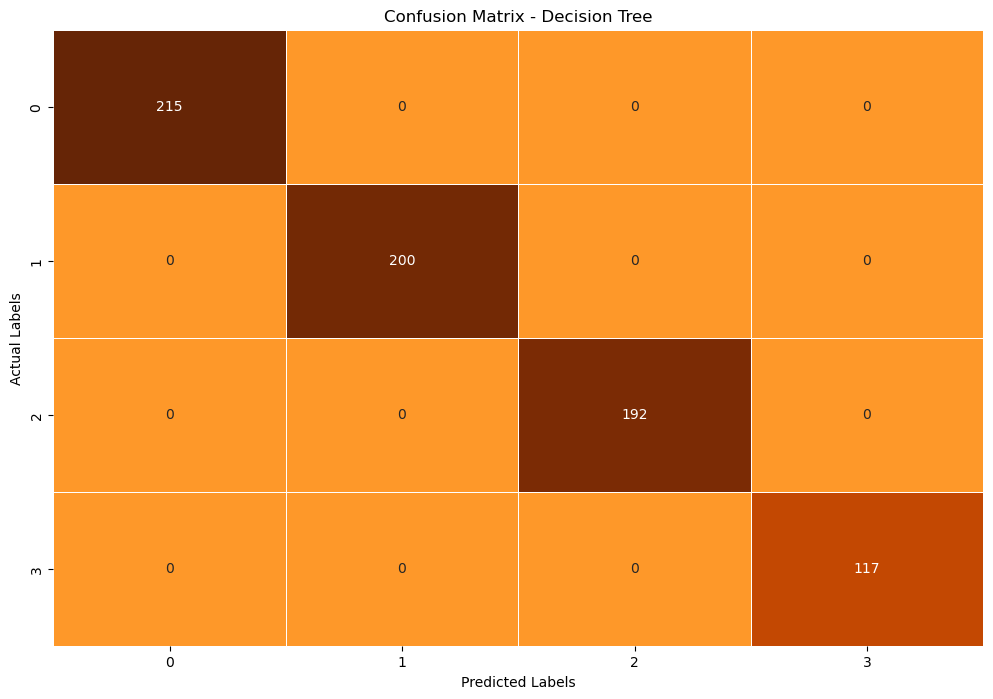

In [16]:
plot_confusion_matrix(y_test, dt_pred, model_name="Decision Tree")

#### -- **Model Random Forest**

Kita akan menggunakan classification_report() untuk menganalisis performa model Random Forest terhadap data uji.

In [17]:
rf_y_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred, digits=5))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       215
           1    1.00000   1.00000   1.00000       200
           2    1.00000   1.00000   1.00000       192
           3    1.00000   1.00000   1.00000       117

    accuracy                        1.00000       724
   macro avg    1.00000   1.00000   1.00000       724
weighted avg    1.00000   1.00000   1.00000       724



Untuk melihat apakah model Random Forest dapat mengklasifikasikan dengan baik, kita cukup memanggil fungsi plot_confusion_matrix() dengan parameter y_test dan y_pred.

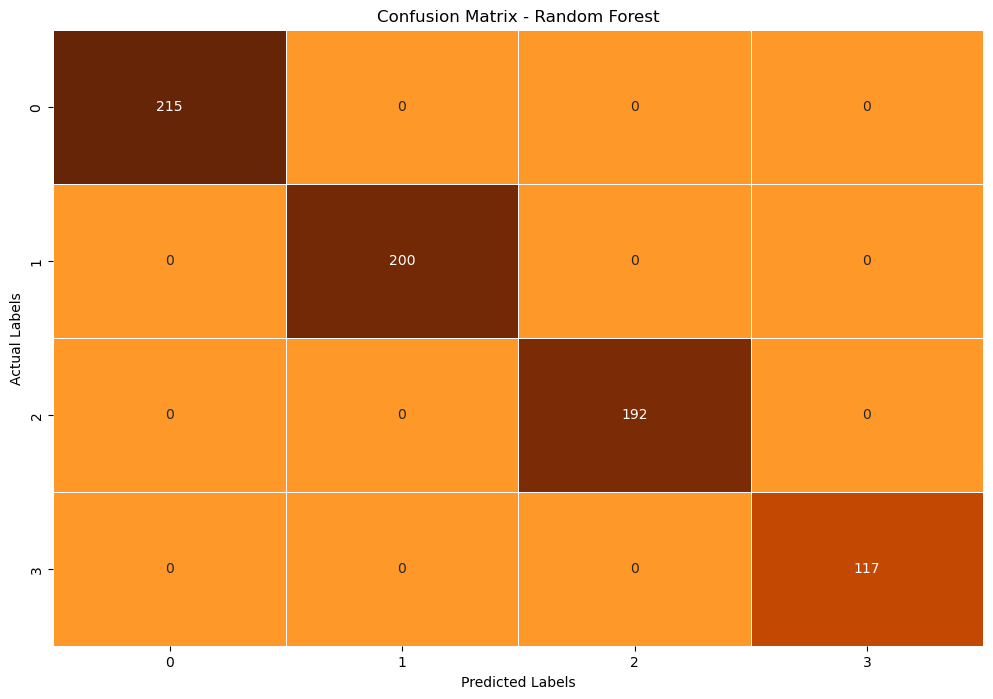

In [18]:
plot_confusion_matrix(y_test, rf_y_pred, model_name="Random Forest")

#### -- **Rangkuman Hasil Evaluasi**

In [19]:
# Calculate classification reports for both models
log_reg_report = classification_report(y_test, log_reg_pred, digits=5, output_dict=True)
dt_report = classification_report(y_test, dt_pred, digits=5, output_dict=True)
rf_report = classification_report(y_test, rf_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_report['accuracy'], dt_report['accuracy'], rf_report['accuracy']],
    'Precision': [
        log_reg_report['weighted avg']['precision'], 
        dt_report['weighted avg']['precision'], 
        rf_report['weighted avg']['precision']
    ],
    'Recall': [
        log_reg_report['weighted avg']['recall'], 
        dt_report['weighted avg']['recall'], 
        rf_report['weighted avg']['recall']
    ],
    'F1-Score': [
        log_reg_report['weighted avg']['f1-score'], 
        dt_report['weighted avg']['f1-score'], 
        rf_report['weighted avg']['f1-score']
    ]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0
2,Random Forest,1.0,1.0,1.0,1.0


Berdasarkan rangkuman hasil evaluasi pada ketiga algoritma diatas, menunjukkan bahwa model Logistic Regression, Decision Tree, dan Random Forest memiliki akurasi sempurna dalam klasifikasi data uji. Berikut ini terdapat insight yang bisa kita ambil:
- Tidak ada kesalahan klasifikasi. Semua prediksi berada di diagonal utama (dari kiri atas ke kanan bawah). Tidak ada nilai selain nol di luar diagonal utama, yang berarti tidak ada instance yang salah diklasifikasikan. Hal ini menunjukkan bahwa model tidak membuat kesalahan sama sekali dalam memprediksi kelas dari data uji.

### **4.3. Tuning Model Klasifikasi (Optional)** (FIX)

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

---

Dalam proses pengembangan model Machine Learning, pemilihan hyperparameter yang optimal sangat penting untuk mendapatkan kinerja terbaik. Hyperparameter adalah parameter yang ditentukan sebelum pelatihan model dan tidak dipelajari dari data. Oleh karena itu, kita harus melakukan pencarian hyperparameter terbaik menggunakan metode seperti  Randomized Search.

#### -- **Tentukan Hyperparameter**

Pada implementasi ini, kita mendefinisikan hyperparameter space untuk tiga model klasifikasi utama: Logistic Regression, Decision Tree, dan Random Forest.

In [20]:
# Define Logistic Regression hyperparameters
log_reg_param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'penalty': ['l1', 'l2', 'elasticnet', None]  # Regularization type
}

# Define Decision Tree hyperparameters
dt_param_dist = {
    'max_depth': np.arange(3, 50, 5),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),  # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Define Random Forest hyperparameters
rf_param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

Dengan mendefinisikan hyperparameter space ini, kita siap untuk melakukan tuning hyperparameter menggunakan RandomizedSearchCV

#### -- **Hyperparameter Tuning**

Setelah mendefinisikan hyperparameter space untuk Logistic Regression, Decision Tree, dan Random Forest, langkah selanjutnya adalah mencari kombinasi terbaik yang dapat meningkatkan performa model.

Untuk melakukan ini, kita menggunakan RandomizedSearchCV dari sklearn.model_selection. Pendekatan ini lebih efisien dibandingkan Grid Search, karena hanya mengeksplorasi sejumlah kombinasi parameter secara acak daripada mencoba semua kemungkinan kombinasi.

In [21]:
# Perform RandomizedSearchCV for Logistic Regression
log_reg_random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=69, max_iter=500),
    param_distributions=log_reg_param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

# Perform RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=69),
    param_distributions=dt_param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=69),
    param_distributions=rf_param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

Dengan menerapkan RandomizedSearchCV, kita dapat menemukan kombinasi hyperparameter terbaik untuk setiap model tanpa harus mencoba semua kemungkinan kombinasi. Hal ini menghemat waktu komputasi, sekaligus meningkatkan performa model dengan optimalisasi yang lebih baik. 

Setelah mendefinisikan hyperparameter space dan melakukan RandomizedSearchCV untuk mencari kombinasi terbaik, langkah selanjutnya adalah melatih model menggunakan dataset pelatihan. Ketiga model, yaitu Logistic Regression, Decision Tree, dan Random Forest, akan di-fit pada data training (X_train, y_train) menggunakan kombinasi hyperparameter yang telah dipilih secara optimal.

In [22]:
log_reg_random_search.fit(X_train, y_train)
dt_random_search.fit(X_train, y_train)
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Program_Files\Anaconda\envs\datascience\Lib\site-pac

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=69),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=69, verbose=2)

### **4.4. Evaluasi Model Klasifikasi setelah Tuning (Optional)** (FIX)

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

---

In [23]:
def evaluate_model(model_search, model_name, X_test, y_test):
    """
    Mencetak hyperparameter terbaik, akurasi terbaik, dan classification report
    untuk model yang telah dilakukan hyperparameter tuning dengan RandomizedSearchCV.
    Juga mengembalikan hasil prediksi untuk analisis lebih lanjut.
    
    Parameters:
        model_search: objek RandomizedSearchCV yang sudah dilatih
        model_name: string, nama model (misal: "Random Forest")
        X_test: data uji
        y_test: label uji

    Returns:
        y_pred: array, hasil prediksi model terbaik pada data uji
    """
    print(f"-----------------------------")
    print(f"{model_name}")
    print(f"-----------------------------")
    
    # Print hyperparameter terbaik dan skor terbaik
    print(f"Best {model_name} Hyperparameters:", model_search.best_params_)
    print(f"Best {model_name} Accuracy:", model_search.best_score_)
    
    # Prediksi dengan model terbaik
    best_model = model_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Print classification report
    print(f"{model_name} (best model) Classification Report:\n", 
          classification_report(y_test, y_pred, digits=5))
    print("\n")
    
    return y_pred

# Evaluasi masing-masing model dan simpan hasil prediksi
rf_best_model_y_pred = evaluate_model(rf_random_search, "Random Forest", X_test, y_test)
log_reg_best_model_y_pred = evaluate_model(log_reg_random_search, "Logistic Regression", X_test, y_test)
dt_best_model_y_pred = evaluate_model(dt_random_search, "Decision Tree", X_test, y_test)

-----------------------------
Random Forest
-----------------------------
Best Random Forest Hyperparameters: {'n_estimators': 450, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 25, 'bootstrap': True}
Best Random Forest Accuracy: 1.0
Random Forest (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       215
           1    1.00000   1.00000   1.00000       200
           2    1.00000   1.00000   1.00000       192
           3    1.00000   1.00000   1.00000       117

    accuracy                        1.00000       724
   macro avg    1.00000   1.00000   1.00000       724
weighted avg    1.00000   1.00000   1.00000       724



-----------------------------
Logistic Regression
-----------------------------
Best Logistic Regression Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1.623776739188721}
Best Logistic Regression Accuracy: 1.0
Logistic Regression (

In [24]:
# Menghitung classification report untuk semua model dalam format dictionary
rf_best_report = classification_report(y_test, rf_best_model_y_pred, digits=5, output_dict=True)
log_reg_best_report = classification_report(y_test, log_reg_best_model_y_pred, digits=5, output_dict=True)
dt_best_report = classification_report(y_test, dt_best_model_y_pred, digits=5, output_dict=True)

# Menyusun metrik evaluasi utama dari setiap model ke dalam dictionary
metrics_tuned = {
    # Menyimpan nama model yang telah dilakukan tuning
    'Model': ['Random Forest (Tuned)', 'Logistic Regression (Tuned)', 'Decision Tree (Tuned)'],
    
    # Menyimpan nilai akurasi dari masing-masing model
    'Accuracy': [
        rf_best_report['accuracy'],  # Akurasi dari model Random Forest terbaik
        log_reg_best_report['accuracy'],  # Akurasi dari model Logistic Regression terbaik
        dt_best_report['accuracy']  # Akurasi dari model Decision Tree terbaik
    ],
    
    # Menyimpan nilai precision rata-rata tertimbang (weighted avg) untuk setiap model
    'Precision': [
        rf_best_report['weighted avg']['precision'],  # Precision dari Random Forest
        log_reg_best_report['weighted avg']['precision'],  # Precision dari Logistic Regression
        dt_best_report['weighted avg']['precision']  # Precision dari Decision Tree
    ],
    
    # Menyimpan nilai recall rata-rata tertimbang (weighted avg) untuk setiap model
    'Recall': [
        rf_best_report['weighted avg']['recall'],  # Recall dari Random Forest
        log_reg_best_report['weighted avg']['recall'],  # Recall dari Logistic Regression
        dt_best_report['weighted avg']['recall']  # Recall dari Decision Tree
    ],
    
    # Menyimpan nilai F1-score rata-rata tertimbang (weighted avg) untuk setiap model
    'F1-Score': [
        rf_best_report['weighted avg']['f1-score'],  # F1-score dari Random Forest
        log_reg_best_report['weighted avg']['f1-score'],  # F1-score dari Logistic Regression
        dt_best_report['weighted avg']['f1-score']  # F1-score dari Decision Tree
    ]
}

# Membuat DataFrame dari dictionary yang telah disusun
df_tuned = pd.DataFrame(metrics_tuned)

# Menampilkan DataFrame yang berisi hasil evaluasi model setelah tuning
df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Tuned),1.0,1.0,1.0,1.0
1,Logistic Regression (Tuned),1.0,1.0,1.0,1.0
2,Decision Tree (Tuned),1.0,1.0,1.0,1.0


### **4.5. Analisis Hasil Evaluasi Model Klasifikasi** (FIX)

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

---

In [25]:
df_merged = pd.concat([df, df_tuned], ignore_index=True)
df_merged.iloc[[1, 2]] = df_merged.iloc[[2, 1]].values
df_merged

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,Decision Tree,1.0,1.0,1.0,1.0
3,Random Forest (Tuned),1.0,1.0,1.0,1.0
4,Logistic Regression (Tuned),1.0,1.0,1.0,1.0
5,Decision Tree (Tuned),1.0,1.0,1.0,1.0


Sebelum dilakukan tuning, model yang digunakan (Logistic Regression, Random Forest, dan Decision Tree) sudah menunjukkan akurasi, precision, recall, dan F1-score sebesar 1.0 (100%). Hal ini mengindikasikan bahwa model mampu mengklasifikasikan data dengan sempurna tanpa kesalahan.

Namun, nilai yang terlalu sempurna ini perlu diperiksa lebih lanjut karena bisa saja:
- Overfitting – Model mungkin hanya menghafal data dan tidak akan bekerja dengan baik pada data baru.
- Data Tidak Seimbang – Jika ada ketimpangan jumlah sampel antar kelas, model bisa saja hanya belajar untuk mengklasifikasikan mayoritas kelas dengan benar.
- Kesalahan Implementasi – Misalnya, kebocoran data (data leakage) dari dataset pelatihan ke pengujian.


Setelah dilakukan hyperparameter tuning, hasil evaluasi tetap 1.0 di semua metrik untuk semua model. Ini bisa berarti:
- Tuning tidak memberikan perbedaan signifikan, karena model awal sudah sangat baik.
- Data mungkin terlalu mudah diprediksi, sehingga model tidak menemui tantangan dalam klasifikasi.
- Kemungkinan data leakage masih ada, perlu diperiksa ulang apakah data uji benar-benar tidak bocor dari data latih.

Rekomendasi & Langkah Selanjutnya:
1. Cek Data Leakage:
     - Pastikan X_test dan y_test tidak memiliki data yang pernah digunakan dalam pelatihan.
     - Gunakan train_test_split(random_state=None) untuk meminimalkan kemungkinan kebocoran.
2. Lakukan Cross-Validation
     - Gunakan K-Fold Cross Validation untuk mengevaluasi performa model di berbagai subset data.
3. Gunakan Metrik Tambahan
     - Jika memungkinkan, gunakan ROC-AUC Score atau Precision-Recall Curve untuk analisis lebih mendalam.